# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv')

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [8]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)



## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [19]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train, X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [27]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate 

model = KNeighborsRegressor(n_neighbors=1)

cv = cross_validate(model,X_train_scaled, Y_train, cv=5)

cv['test_score'].mean()


0.569025195507008

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors' : [1,5,10,20,50]}

# Instantiate Grid Search
search = GridSearchCV(model, grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
search.fit(X_train_scaled, Y_train);

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [32]:
# YOUR CODE HERE
search.best_params_

{'n_neighbors': 20}

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [33]:
# YOUR CODE HERE
search.best_score_

0.7594265833471792

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [34]:
# Instantiate model
model = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors': [15,17,20,23,25]}

# Instantiate Grid Search
search2 = GridSearchCV(model, grid, cv=5, n_jobs=-1)

# Fit data to Grid Search
search2.fit(X_train_scaled, Y_train);

In [41]:
best_score = search2.best_score_
best_k = search2.best_params_['n_neighbors']
best_k

15

***🧪 Test your code***

In [40]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_knn.py::TestKnn::test_best_k PASSED                           [ 50%]
tests/test_knn.py::TestKnn::test_best_score PASSED                       [100%]

============================== 2 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master


### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

In [66]:
# YOUR CODE HERE
model = KNeighborsRegressor()
lista = []

for i in np.arange(1,51):
    grid = {'n_neighbors': [i]}
    search_50 = GridSearchCV(model, grid, cv=5, n_jobs=-1)
    lista.append(search_50.fit(X_train_scaled, Y_train).best_score_)

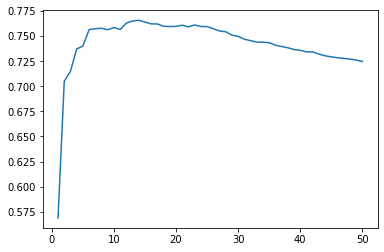

In [67]:
sns.lineplot(x = np.arange(1,51),y=lista);

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to paralellize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

In [70]:
# YOUR CODE HERE
model = KNeighborsRegressor()

grid = {'n_neighbors': [1,5,10,20,50] , 'p':[1,2,3]}

search_x_2 = GridSearchCV(model, grid, cv=5, n_jobs=-1)

search_x_2.fit(X_train_scaled, Y_train)

{'n_neighbors': 10, 'p': 1}

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [ ]:
# YOUR CODE HERE

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [71]:
# YOUR CODE HERE
search_x_2.best_params_

{'n_neighbors': 10, 'p': 1}

In [72]:
search_x_2.best_score_

0.7978142226309175

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `randint(1,50)` distribition
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [86]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

model = KNeighborsRegressor()

grid = {'n_neighbors': stats.randint(1,50), 'p': [1,2,3]}
search_random = RandomizedSearchCV(model, grid, n_iter=15, cv=5, n_jobs=-1)

search_random.fit(X_train_scaled, Y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=15, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f553d289d60>,
                                        'p': [1, 2, 3]})

In [87]:
search_random.best_score_

0.8014890013854652

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [96]:
# YOUR CODE HERE
data = [search.best_score_,search2.best_score_,search_50.best_score_, search_x_2.best_score_, search_random.best_score_]
modelos = ['model1', 'model2', 'model3', 'model4', 'model5']

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [97]:
# YOUR CODE HERE 
cv_results = pd.DataFrame(data, index=modelos, columns=['score'])
cv_results

,score
model1,0.759427
model2,0.763679
model3,0.724501
model4,0.797814
model5,0.801489


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [101]:
# YOUR CODE HERE
search_random.fit(X_test_scaled, Y_test)

r2_test = search_random.best_score_

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [102]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_r2.py::TestR2::test_r2 PASSED                                 [100%]

============================== 1 passed in 0.15s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master


🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!